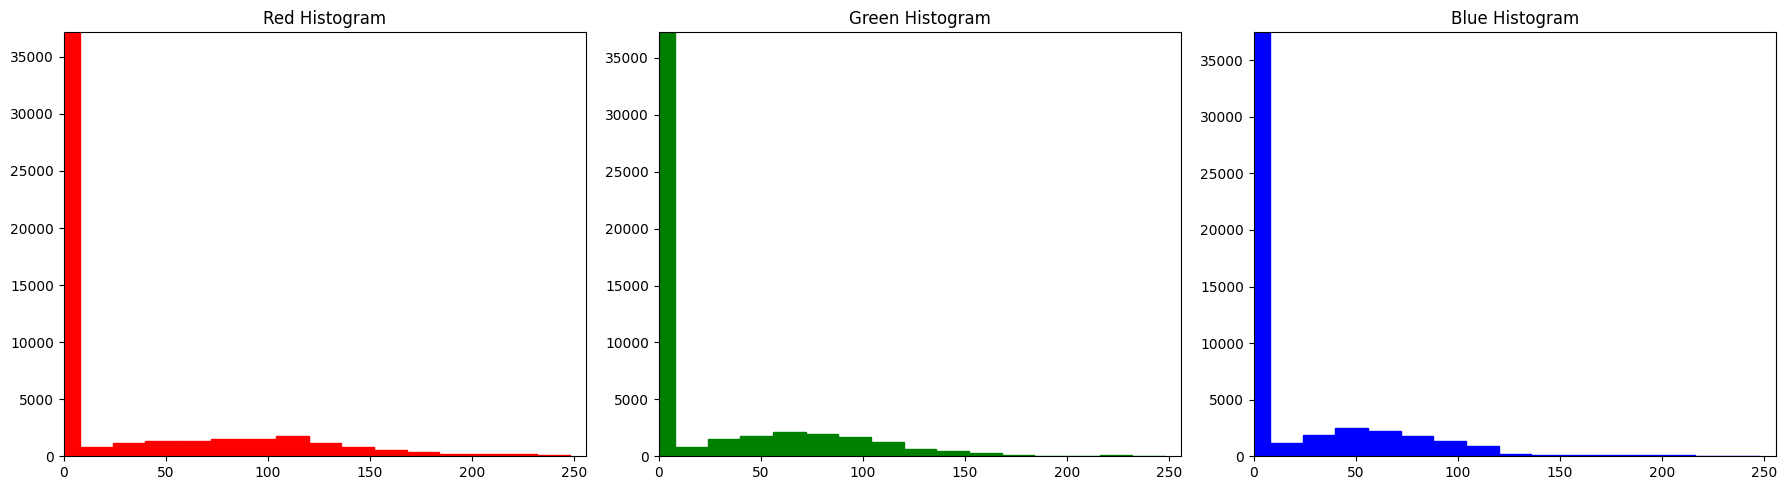

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to calculate and plot histogram with 8 bins for each color channel
def plot_histogram_8_bins(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if image is loaded properly
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define the number of bins
    bins = 16

    # Calculate the color histogram for each channel with 8 bins
    hist_r = cv2.calcHist([image_rgb], [0], None, [bins], [0, 256])
    hist_g = cv2.calcHist([image_rgb], [1], None, [bins], [0, 256])
    hist_b = cv2.calcHist([image_rgb], [2], None, [bins], [0, 256])

    # Define bin edges for 8 bins
    bin_edges = np.linspace(0, 256, bins+1, endpoint=True)

    # Plot the color histograms as bar graphs
    plt.figure(figsize=(18, 5))

    # Red channel histogram
    plt.subplot(131)
    plt.bar(bin_edges[:-1], hist_r.flatten(), width=(256/bins), color='red', edgecolor='red')
    plt.title('Red Histogram')
    plt.xlim([0, 256])
    plt.ylim([0, np.max(hist_r)])

    # Green channel histogram
    plt.subplot(132)
    plt.bar(bin_edges[:-1], hist_g.flatten(), width=(256/bins), color='green', edgecolor='green')
    plt.title('Green Histogram')
    plt.xlim([0, 256])
    plt.ylim([0, np.max(hist_g)])

    # Blue channel histogram
    plt.subplot(133)
    plt.bar(bin_edges[:-1], hist_b.flatten(), width=(256/bins), color='blue', edgecolor='blue')
    plt.title('Blue Histogram')
    plt.xlim([0, 256])
    plt.ylim([0, np.max(hist_b)])

    plt.tight_layout()
    plt.show()

# Provide the path to the image
image_path = 'D:\\1.jpg'
plot_histogram_8_bins(image_path)


Feature Vector (Length 23):
[0.91327256 0.02714272 0.3228324  0.24353309 0.03233959 0.02426252
 0.0053221  0.00212884 0.9503154  0.01748583 0.02014815 0.03395275
 0.02974563 0.02146287 0.02077264 0.02428953 0.04085505 0.086969
 0.1687777  0.23441531 0.9198716  0.34539652 0.18584259]


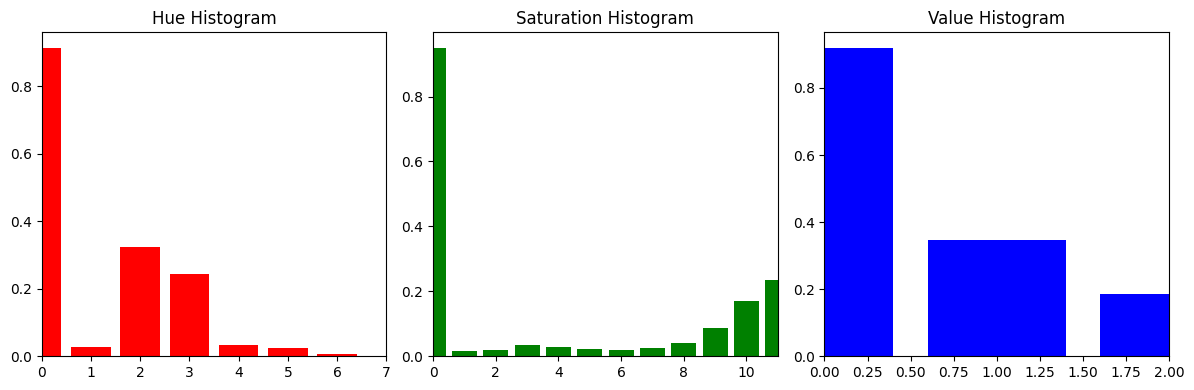

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the HSV histogram and display the feature vector
def hsv_histogram_feature_vector(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if image is loaded properly
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    # Convert the image from BGR to RGB then to HSV
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Define the number of bins for each channel
    h_bins = 8
    s_bins = 12
    v_bins = 3

    # Calculate the histogram for each channel
    hist_h = cv2.calcHist([image_hsv], [0], None, [h_bins], [0, 180])
    hist_s = cv2.calcHist([image_hsv], [1], None, [s_bins], [0, 256])
    hist_v = cv2.calcHist([image_hsv], [2], None, [v_bins], [0, 256])

    # Normalize the histograms
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()

    # Concatenate the histograms into a single feature vector
    feature_vector = np.concatenate((hist_h, hist_s, hist_v))

    # Print the feature vector
    print("Feature Vector (Length {}):".format(len(feature_vector)))
    print(feature_vector)

    # Plot the histograms
    plt.figure(figsize=(12, 4))

    # Hue Histogram
    plt.subplot(1, 3, 1)
    plt.bar(range(h_bins), hist_h, color='r')
    plt.title('Hue Histogram')
    plt.xlim([0, h_bins - 1])

    # Saturation Histogram
    plt.subplot(1, 3, 2)
    plt.bar(range(s_bins), hist_s, color='g')
    plt.title('Saturation Histogram')
    plt.xlim([0, s_bins - 1])

    # Value Histogram
    plt.subplot(1, 3, 3)
    plt.bar(range(v_bins), hist_v, color='b')
    plt.title('Value Histogram')
    plt.xlim([0, v_bins - 1])

    plt.tight_layout()
    plt.show()

    return feature_vector

# Provide the path to the image
image_path = 'D:\\5.png'

# Generate and display the feature vector for the HSV histogram
feature_vector = hsv_histogram_feature_vector(image_path)


In [4]:
import cv2
import numpy as np

def hog_feature_vector(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh dưới dạng ảnh xám
    
    # Kiểm tra nếu ảnh không tải được
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    # Tạo đối tượng HOG Descriptor
    # cell_size, block_size, và nbins là các thông số có thể điều chỉnh
    cell_size = (8, 8)  # Kích thước của mỗi cell là 8x8
    block_size = (2, 2)  # Mỗi block chứa 2x2 cell
    nbins = 9  # Số lượng bin cho histogram hướng gradient

    hog = cv2.HOGDescriptor(_winSize=(image.shape[1] // cell_size[1] * cell_size[1],
                                      image.shape[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)

    # Tính toán HOG descriptors
    hog_features = hog.compute(image)
    
    # Chuyển vector đặc trưng về dạng 1 chiều (flatten)
    hog_features = hog_features.flatten()
    
    return hog_features
# Đường dẫn đến hình ảnh
image_path = 'D:\\5.png'

# Lấy vector đặc trưng HOG
feature_vector = hog_feature_vector(image_path)

# In vector đặc trưng
print("HOG Feature Vector:", feature_vector)
print("Length of HOG Feature Vector:", len(feature_vector))


HOG Feature Vector: [0. 0. 0. ... 0. 0. 0.]
Length of HOG Feature Vector: 26244


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hsv_histogram_feature_vector(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_bins = 8
    s_bins = 12
    v_bins = 3
    hist_h = cv2.calcHist([image_hsv], [0], None, [h_bins], [0, 180])
    hist_s = cv2.calcHist([image_hsv], [1], None, [s_bins], [0, 256])
    hist_v = cv2.calcHist([image_hsv], [2], None, [v_bins], [0, 256])
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()
    return np.concatenate((hist_h, hist_s, hist_v))

def hog_feature_vector(image):
    # Setup HOG descriptor parameters
    cell_size = (8, 8)
    block_size = (2, 2)
    nbins = 9
    hog = cv2.HOGDescriptor(_winSize=(image.shape[1] // cell_size[1] * cell_size[1],
                                      image.shape[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)
    hog_features = hog.compute(image)
    return hog_features.flatten()

def combined_feature_vector(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    # Tính toán vector đặc trưng HOG
    hog_vector = hog_feature_vector(image)

    # Tính toán vector đặc trưng HSV
    hsv_vector = hsv_histogram_feature_vector(image)

    # Kết hợp hai vector đặc trưng
    combined_vector = np.concatenate((hog_vector, hsv_vector))
    return combined_vector

# Đường dẫn đến hình ảnh
image_path = 'D:\\1.jpg'

# Lấy vector đặc trưng kết hợp
feature_vector = combined_feature_vector(image_path)

# In vector đặc trưng
print("Combined Feature Vector:", feature_vector)
print("Length of Combined Feature Vector:", len(feature_vector))


Combined Feature Vector: [0.         0.         0.         ... 0.98508024 0.16902359 0.03237175]
Length of Combined Feature Vector: 26267


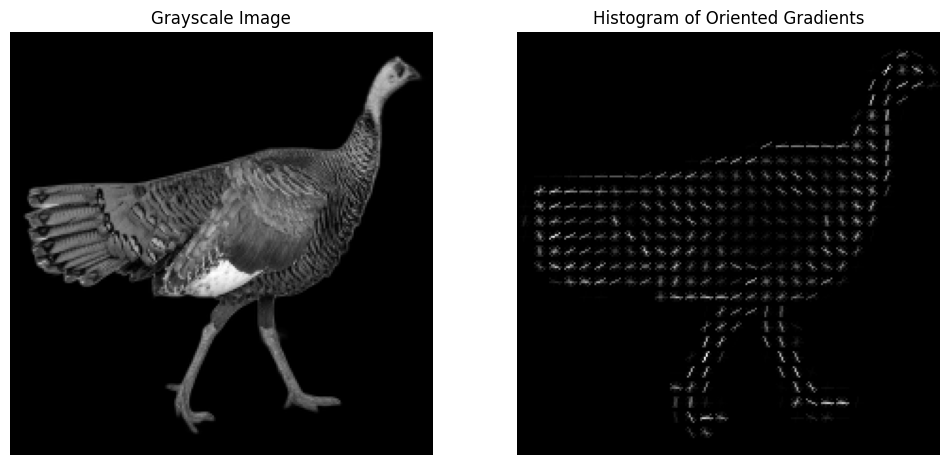

HOG Feature Vector: [0. 0. 0. ... 0. 0. 0.]
Length of HOG Feature Vector: 26244


In [7]:
import cv2
import numpy as np
from skimage import feature
from skimage import exposure
import matplotlib.pyplot as plt

def convert_image_rgb_to_gray(img_rgb, resize="no"):
    # Use OpenCV to convert the image from RGB to grayscale
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    # Resize if the resize option is not "no"
    if resize != "no":
        img_gray = cv2.resize(img_gray, (496, 496))
    return img_gray

def hog_feature(gray_img):
    # Calculate HOG features and return both features and HOG image
    hog_feats, hog_image = feature.hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                                       cells_per_block=(2, 2), transform_sqrt=True,
                                       block_norm="L2", visualize=True)
    return hog_feats, hog_image

# Load an image from disk
image_path = 'D:\\1.jpg'
img_rgb = cv2.imread(image_path)

# Check if image is loaded properly
if img_rgb is None:
    print("Error: Unable to load image")
else:
    # Convert the image to grayscale
    img_gray = convert_image_rgb_to_gray(img_rgb)

    # Calculate HOG features and get HOG visualization
    hog_features, hog_image = hog_feature(img_gray)

    # Display the original grayscale image and HOG image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(img_gray, cmap=plt.cm.gray)
    ax1.set_title('Grayscale Image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')

    plt.show()

    # Print the HOG features
    print("HOG Feature Vector:", hog_features)
    print("Length of HOG Feature Vector:", len(hog_features))

